<h1 style="text-align:center;vertical-align:middle">数据探索性分析与数据预处理</h1>
<h3 style="text-align:center;vertical-align:middle">1120193289  刘倞 计算机学院07111908班</h3>

github地址：https://github.com/106877952/DM_homework_week4

<h3 style="text-align:left;vertical-align:left">选用数据集Movies Dataset from Pirated Sites</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("movies_dataset_from_pirated_sites/movies_dataset.csv",encoding='ISO-8859-1')
dataset.dtypes

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for     object
director            object
downloads          float64
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views              float64
writer              object
dtype: object

数据属性介绍：

**Unnamed: 0**: number

**IMDb-rating**: rating

**appropriate_for**: R-rated, PG-13, etc

**director**: director's name

**downloads**: no. of downloads per movie

**id**: movie's unique id

**industry**: Hollywood, Bollywood, etc.

**language**: this can be multiple languages also

**posted_date**: when the movie is posted on the platform

**release_date**: when the movie is released worldwide

**runtime**: in minutes

**storyline**: a short description of the movie

**title**: movie's name

**views**: no. of clicks per movie

**writer**: list of all the writers

In [3]:
#预览前数据集前5行
dataset.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\n facilitates a fragile truce between the ...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\n Goldy Berry reunites with detective ...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


<h3 style="text-align:left;vertical-align:left">数据摘要和可视化</h3>

**IMDb-rating** 数值属性

In [4]:
attribute = "IMDb-rating"

#五数概括
print('Min:', dataset[attribute].quantile(0))
print('Q1:', dataset[attribute].quantile(0.25))
print('Q2:', dataset[attribute].quantile(0.5))
print('Q3:', dataset[attribute].quantile(0.75))
print('Max:', dataset[attribute].quantile(1))

Min: 1.1
Q1: 4.8
Q2: 5.7
Q3: 6.6
Max: 9.9


<Axes: >

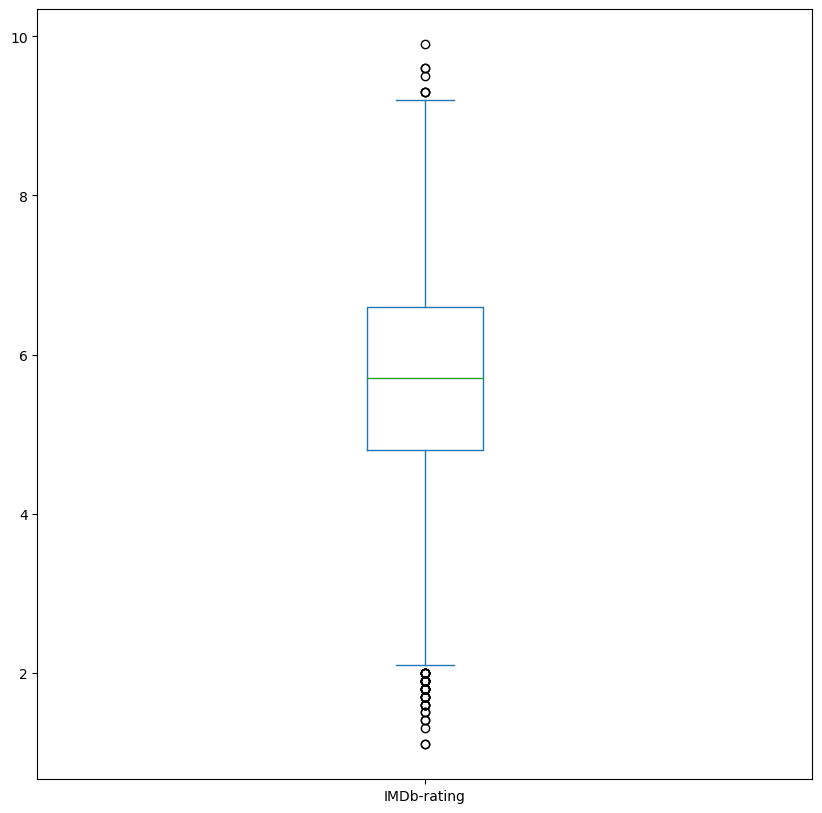

In [5]:
#绘制盒图
dataset[attribute].plot(kind="box",figsize=(10,10))

<Axes: ylabel='Frequency'>

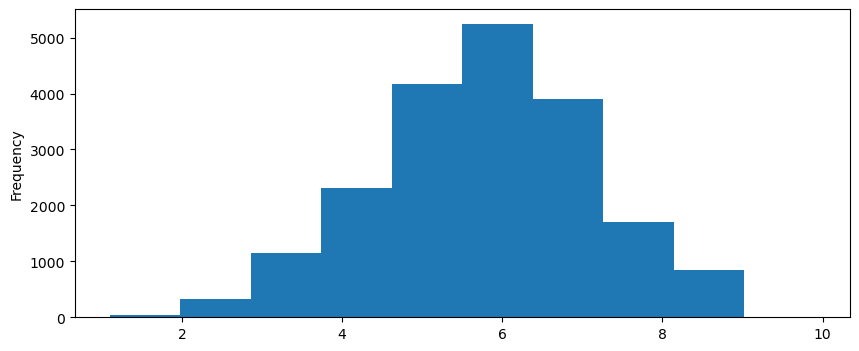

In [6]:
#绘制直方图
dataset[attribute].plot(kind="hist",figsize=(10,4))

In [7]:
#查找离群点
Q1 = dataset[attribute].quantile(0.25)
Q3 = dataset[attribute].quantile(0.75)
outlinermax = Q3 + (Q3 - Q1) * 1.5
outlinermin = Q1 - (Q3 - Q1) * 1.5
print(f"大于{outlinermax}的项被识别为离群点")
print(f"小于{outlinermin}的项被识别为离群点")

大于9.299999999999999的项被识别为离群点
小于2.1的项被识别为离群点


**appropriate_for** 标称属性

In [8]:
attribute = "appropriate_for"
dataset_appropriate_for = dataset[attribute].value_counts(dropna=False)
dataset_appropriate_for

NaN               9476
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

<Axes: >

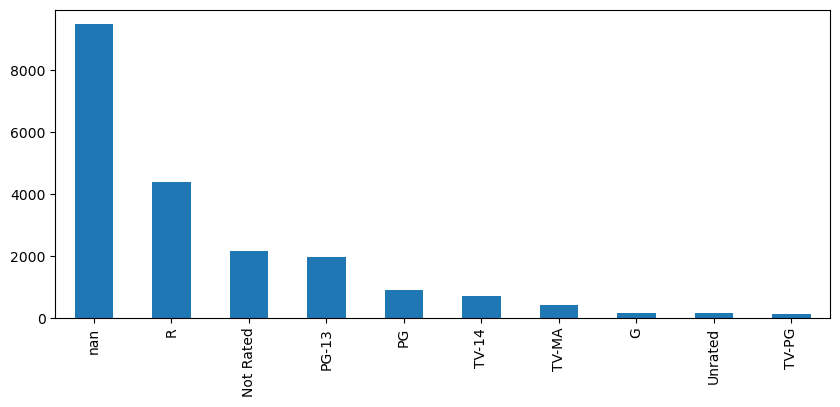

In [9]:
#数据太大，仅显示前10个
dataset_appropriate_for[:10].plot(kind="bar", figsize=(10,4))

**director** 标称属性

In [10]:
attribute = "director"
dataset_director = dataset[attribute].value_counts(dropna=False)
dataset_director

NaN                1938
Venky Atluri        405
Simone Stock        403
Xavier Manrique     403
John Swab           205
                   ... 
David G. Evans        1
Theresa Rebeck        1
Mark Grentell         1
Nick Searcy           1
Becca Gleason         1
Name: director, Length: 9673, dtype: int64

<Axes: >

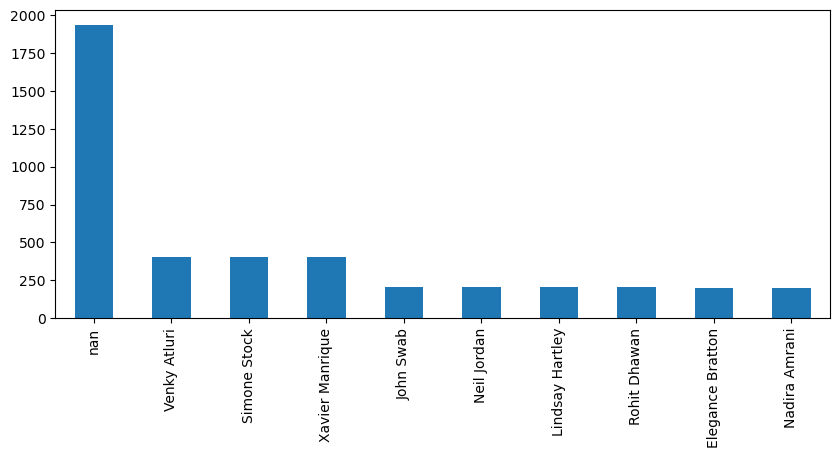

In [11]:
#数据太大，仅显示前10个
dataset_director[:10].plot(kind="bar", figsize=(10,4))

**downloads** 数值属性

In [12]:
attribute = "downloads"

#五数概括
print('Min:', dataset[attribute].quantile(0))
print('Q1:', dataset[attribute].quantile(0.25))
print('Q2:', dataset[attribute].quantile(0.5))
print('Q3:', dataset[attribute].quantile(0.75))
print('Max:', dataset[attribute].quantile(1))

Min: 0.0
Q1: 855.5
Q2: 2716.0
Q3: 10070.0
Max: 391272.0


<Axes: >

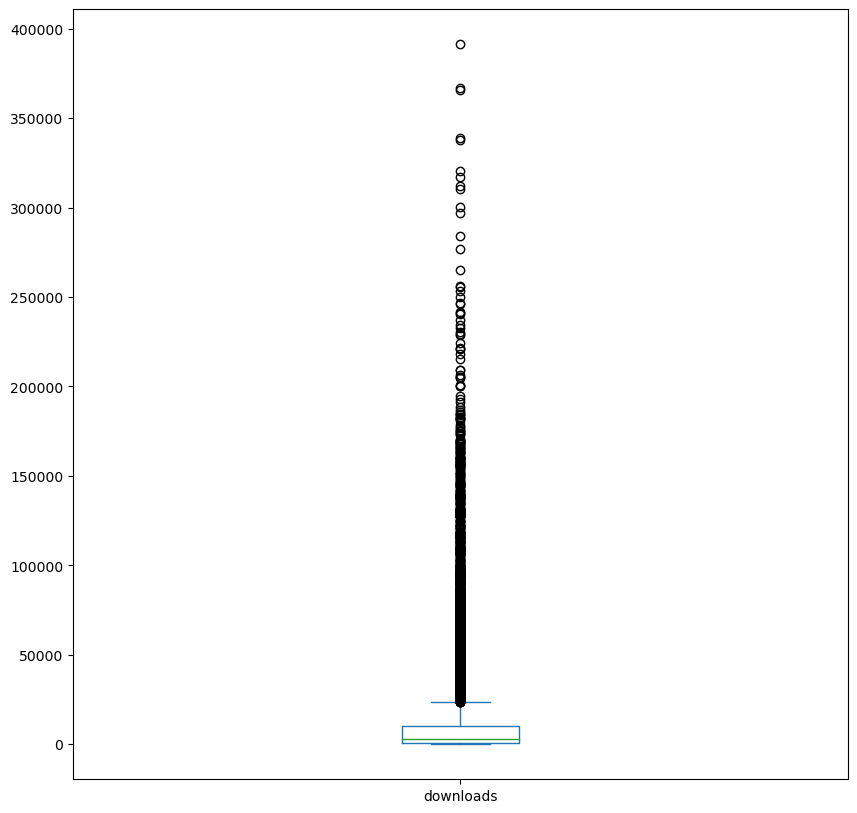

In [13]:
#绘制盒图
dataset[attribute].plot(kind="box",figsize=(10,10))

<Axes: ylabel='Frequency'>

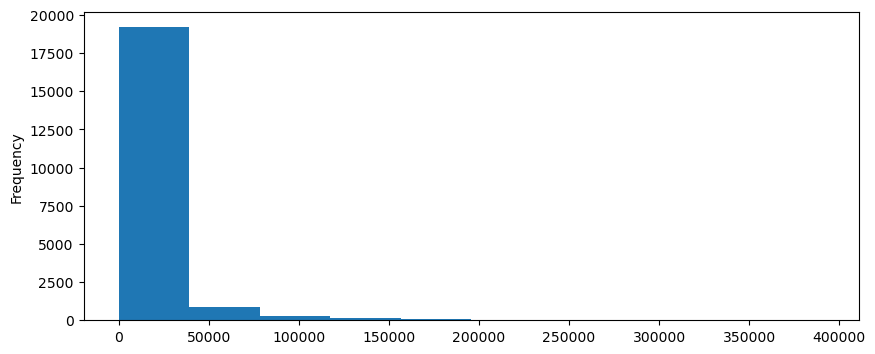

In [14]:
#绘制直方图
dataset[attribute].plot(kind="hist",figsize=(10,4))

In [15]:
#查找离群点
Q1 = dataset[attribute].quantile(0.25)
Q3 = dataset[attribute].quantile(0.75)
outliner = Q3 + (Q3 - Q1) * 1.5
print(f"大于{outliner}的项被识别为离群点")

大于23891.75的项被识别为离群点


**id** 标称属性

In [16]:
attribute = "id"
dataset_id = dataset[attribute].value_counts(dropna=False)
dataset_id

372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: id, Length: 17086, dtype: int64

<Axes: >

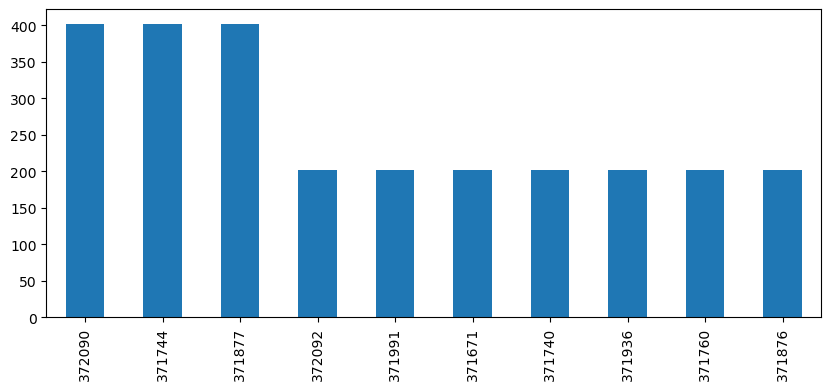

In [17]:
#数据太大，仅显示前10个
dataset_id[:10].plot(kind="bar", figsize=(10,4))

**industry** 标称属性

In [18]:
attribute = "industry"
dataset_industry = dataset[attribute].value_counts(dropna=False)
dataset_industry

Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
NaN                        1
3D Movies                  1
Name: industry, dtype: int64

<Axes: >

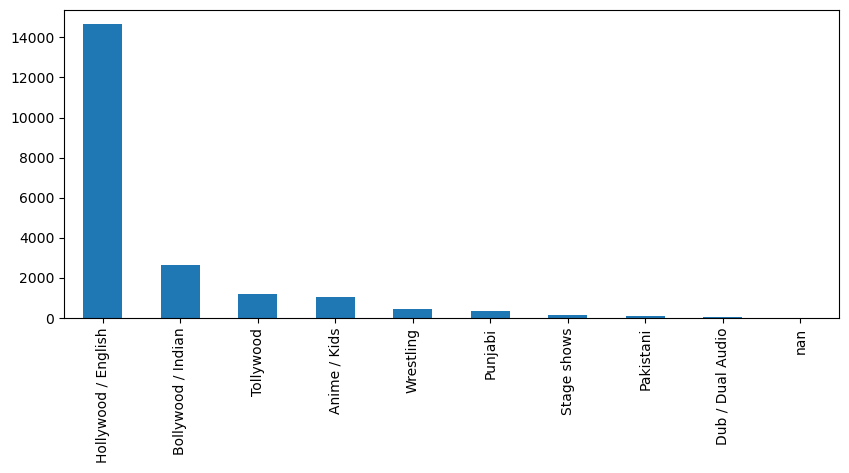

In [19]:
#数据太大，仅显示前10个
dataset_industry[:10].plot(kind="bar", figsize=(10,4))

**language** 标称属性

In [20]:
attribute = "language"
dataset_language = dataset[attribute].value_counts(dropna=False)
dataset_language


English                                          12657
Hindi                                             2558
NaN                                                542
English,Spanish                                    391
Punjabi                                            310
                                                 ...  
English,Mandarin,Turkish,Indonesian,Russian          1
English,Polynesian,Spanish                           1
English,Cheyenne,French                              1
English,American Sign Language,Russian,French        1
Spanish,German,English                               1
Name: language, Length: 1169, dtype: int64

<Axes: >

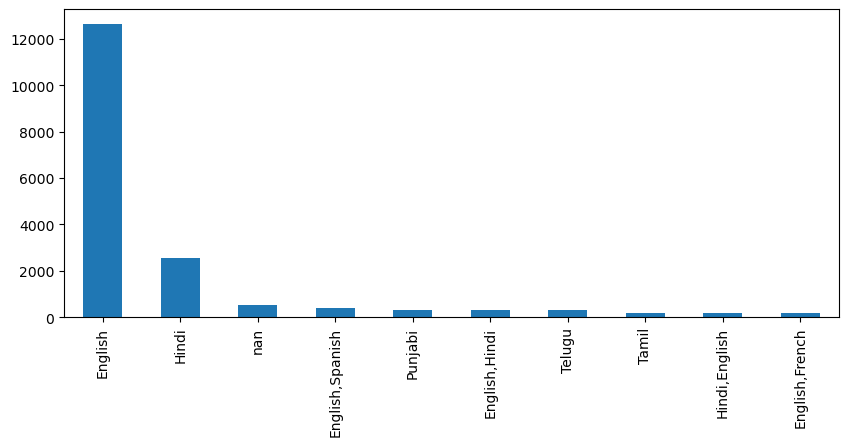

In [21]:
#数据太大，仅显示前10个
dataset_language[:10].plot(kind="bar", figsize=(10,4))

**posted_date** 标称属性

In [22]:
attribute = "posted_date"
dataset_posted_date = dataset[attribute].value_counts(dropna=False)
dataset_posted_date


13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
17 Aug, 2009      1
30 Nov, 2011      1
Name: posted_date, Length: 4124, dtype: int64

<Axes: >

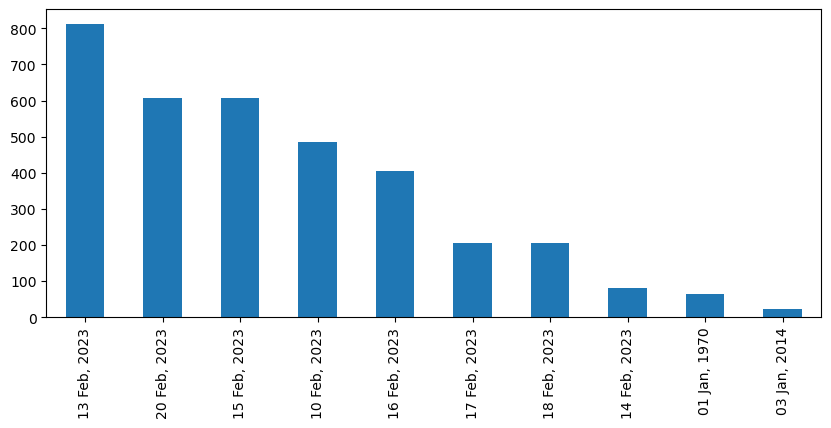

In [23]:
#数据太大，仅显示前10个
dataset_posted_date[:10].plot(kind="bar", figsize=(10,4))

**release_date** 标称属性

In [24]:
attribute = "release_date"
dataset_release_date = dataset[attribute].value_counts(dropna=False)
dataset_release_date


Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Jan 10 2018      1
May 10 2018      1
Apr 18 2018      1
Oct 26 2013      1
Mar 28 1958      1
Name: release_date, Length: 4887, dtype: int64

<Axes: >

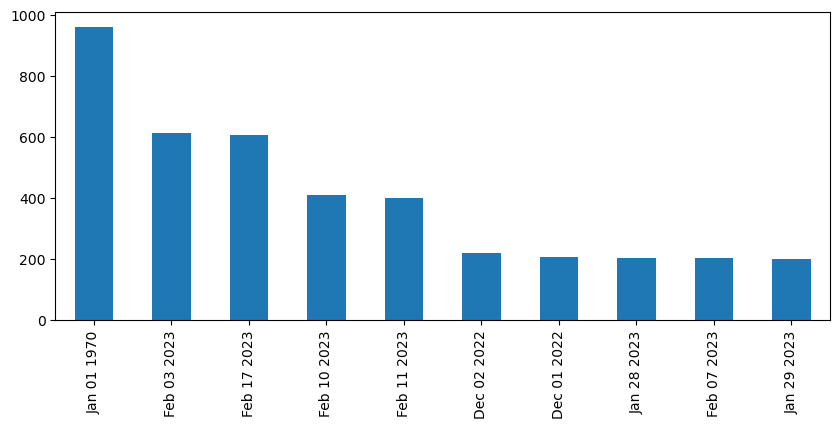

In [25]:
#数据太大，仅显示前10个
dataset_release_date[:10].plot(kind="bar", figsize=(10,4))

**run_time** 标识属性

In [26]:
attribute = "run_time"
dataset_run_time = dataset[attribute].value_counts(dropna=False)
dataset_run_time


NaN         1768
93           652
88           622
101          568
139          454
            ... 
74 min         1
288            1
220            1
49min          1
3h 13min       1
Name: run_time, Length: 416, dtype: int64

<Axes: >

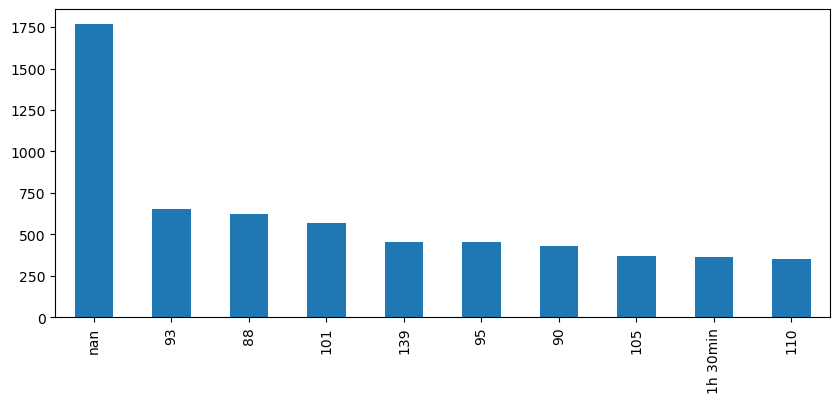

In [27]:
#数据太大，仅显示前10个
dataset_run_time[:10].plot(kind="bar", figsize=(10,4))

**storyline** 标识属性

In [28]:
attribute = "storyline"
dataset_storyline = dataset[attribute].value_counts(dropna=False)
dataset_storyline

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  1701
The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                     402
Follows\n a New York City family hiding out in the H

<Axes: >

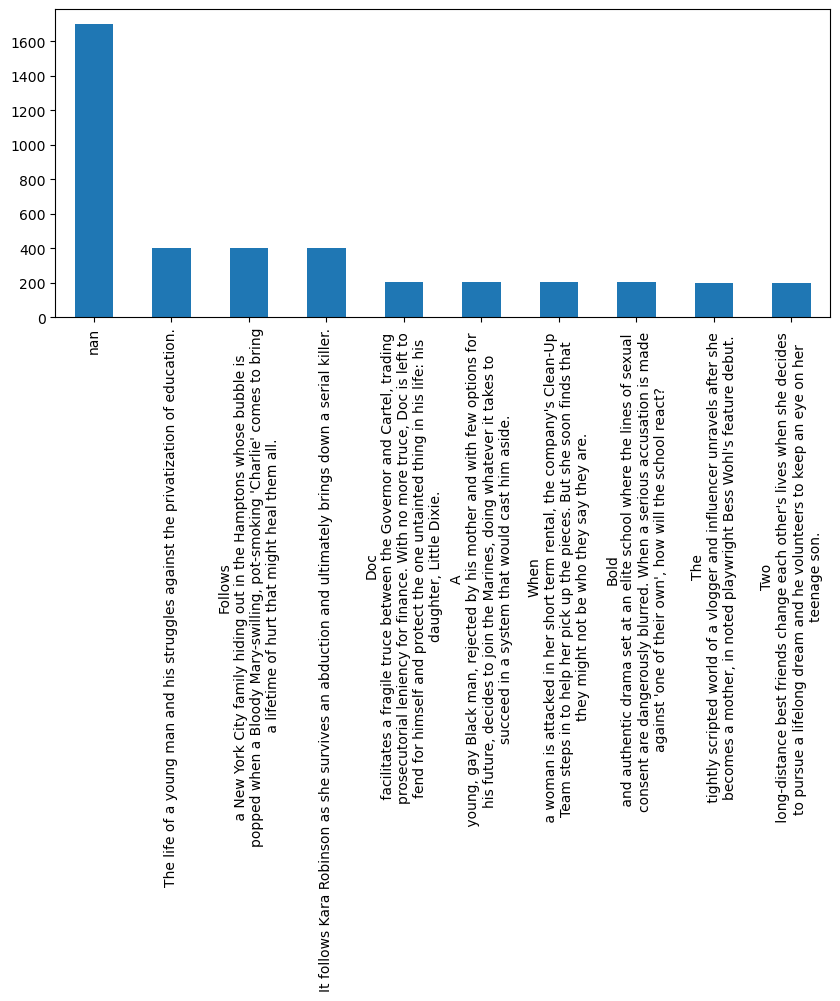

In [29]:
#数据太大，仅显示前10个
dataset_storyline[:10].plot(kind="bar", figsize=(10,4))

**title** 标识属性

In [30]:
attribute = "title"
dataset_title = dataset[attribute].value_counts(dropna=False)
dataset_title

The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Hamid                                              1
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Madhumati                                          1
Name: title, Length: 16573, dtype: int64

<Axes: >

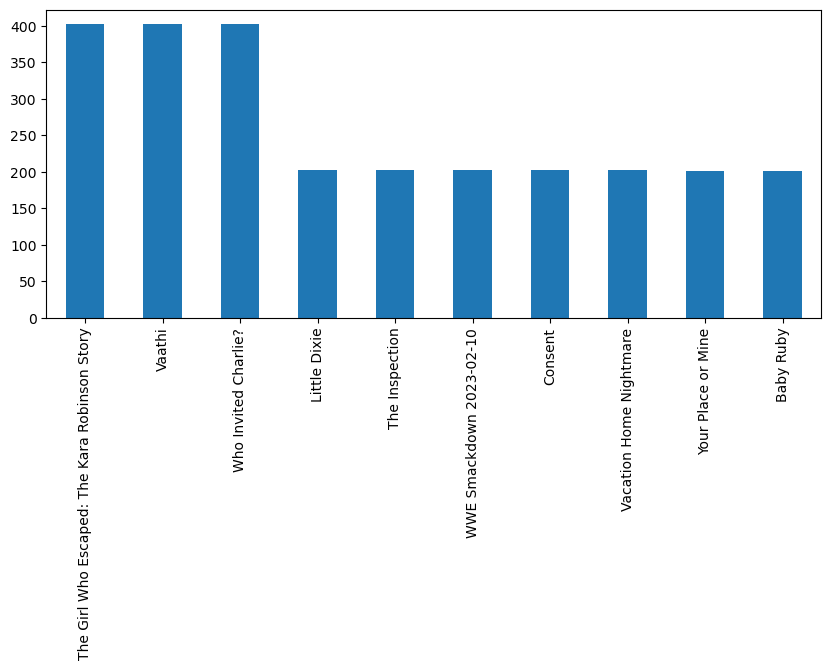

In [31]:
#数据太大，仅显示前10个
dataset_title[:10].plot(kind="bar", figsize=(10,4))

**views** 数值属性

In [32]:
attribute = "views"

#五数概括
print('Min:', dataset[attribute].quantile(0))
print('Q1:', dataset[attribute].quantile(0.25))
print('Q2:', dataset[attribute].quantile(0.5))
print('Q3:', dataset[attribute].quantile(0.75))
print('Max:', dataset[attribute].quantile(1))

Min: 667.0
Q1: 7571.5
Q2: 15222.0
Q3: 36571.0
Max: 1638533.0


<Axes: >

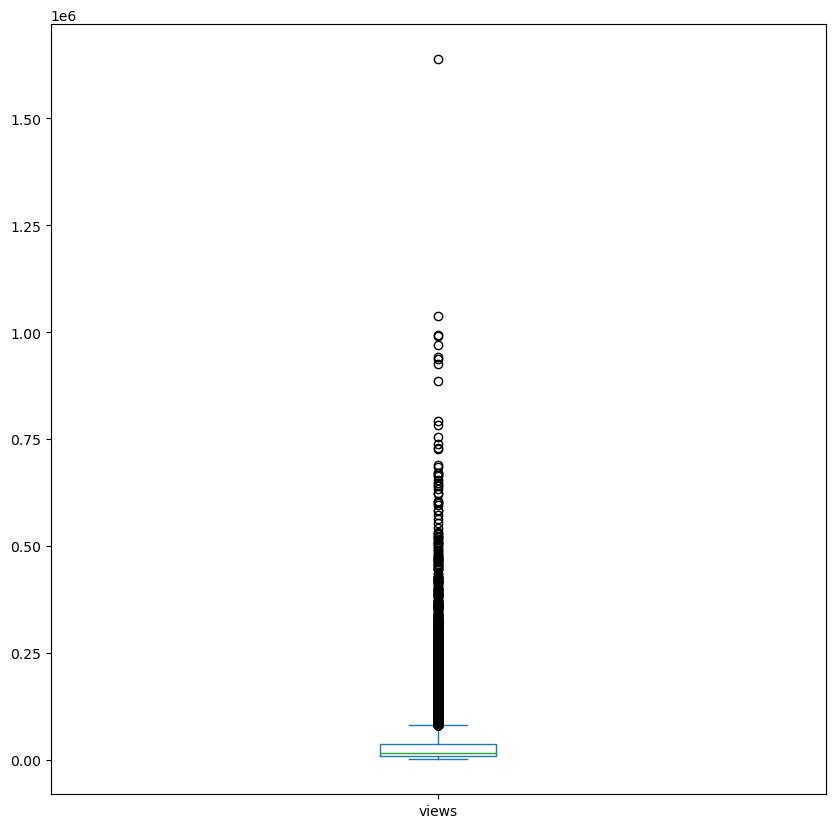

In [33]:
#绘制盒图
dataset[attribute].plot(kind="box",figsize=(10,10))

<Axes: ylabel='Frequency'>

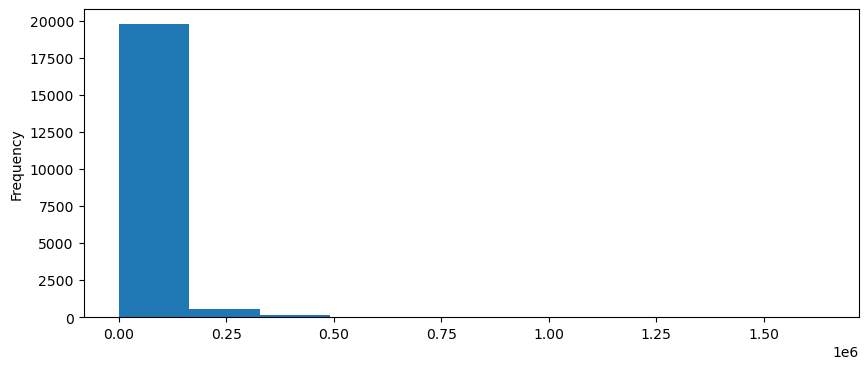

In [34]:
#绘制直方图
dataset[attribute].plot(kind="hist",figsize=(10,4))

In [35]:
#查找离群点
Q1 = dataset[attribute].quantile(0.25)
Q3 = dataset[attribute].quantile(0.75)
outliner = Q3 + (Q3 - Q1) * 1.5
print(f"大于{outliner}的项被识别为离群点")

大于80070.25的项被识别为离群点


**writer** 标识属性

In [36]:
attribute = "writer"
dataset_writer = dataset[attribute].value_counts(dropna=False)
dataset_writer

NaN                                       2192
Nicholas Schutt                            403
Venky Atluri                               402
Haley Harris                               402
John Swab                                  205
                                          ... 
Barbara Samuels, Joseph Boyden               1
Maria Allred                                 1
Pia Mechler                                  1
Paul Flannery, David Ryan Keith              1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas       1
Name: writer, Length: 13604, dtype: int64

<Axes: >

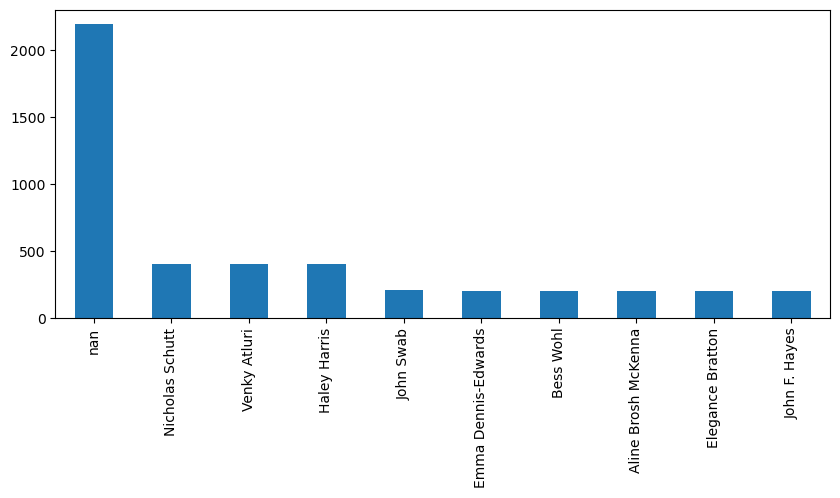

In [37]:
#数据太大，仅显示前10个
dataset_writer[:10].plot(kind="bar", figsize=(10,4))

<h3 style="text-align:left;vertical-align:left">数据缺失的处理</h3>

In [38]:
#统计所有属性数据的缺失值个数
print(dataset.isnull().sum(axis=0))

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64


处理**IMDb-rating**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [39]:
attribute = "IMDb-rating"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

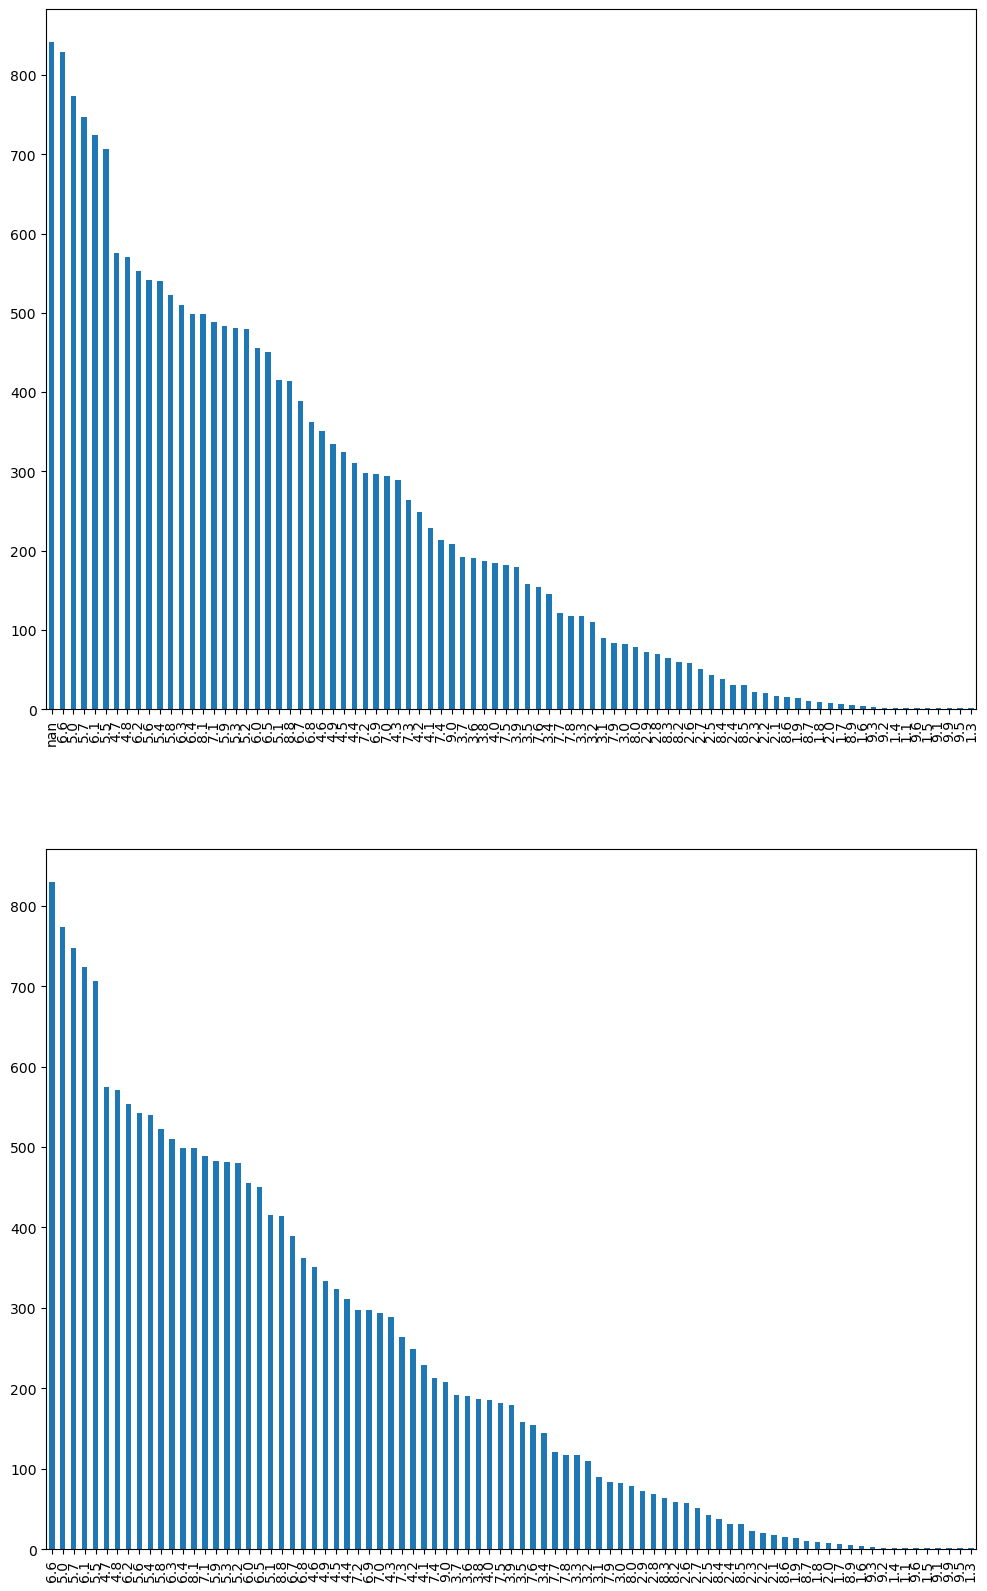

In [40]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False).plot(kind="bar",figsize=(12,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False).plot(kind="bar",figsize=(12,20))

处理**appropriate_for**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [41]:
attribute = "appropriate_for"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

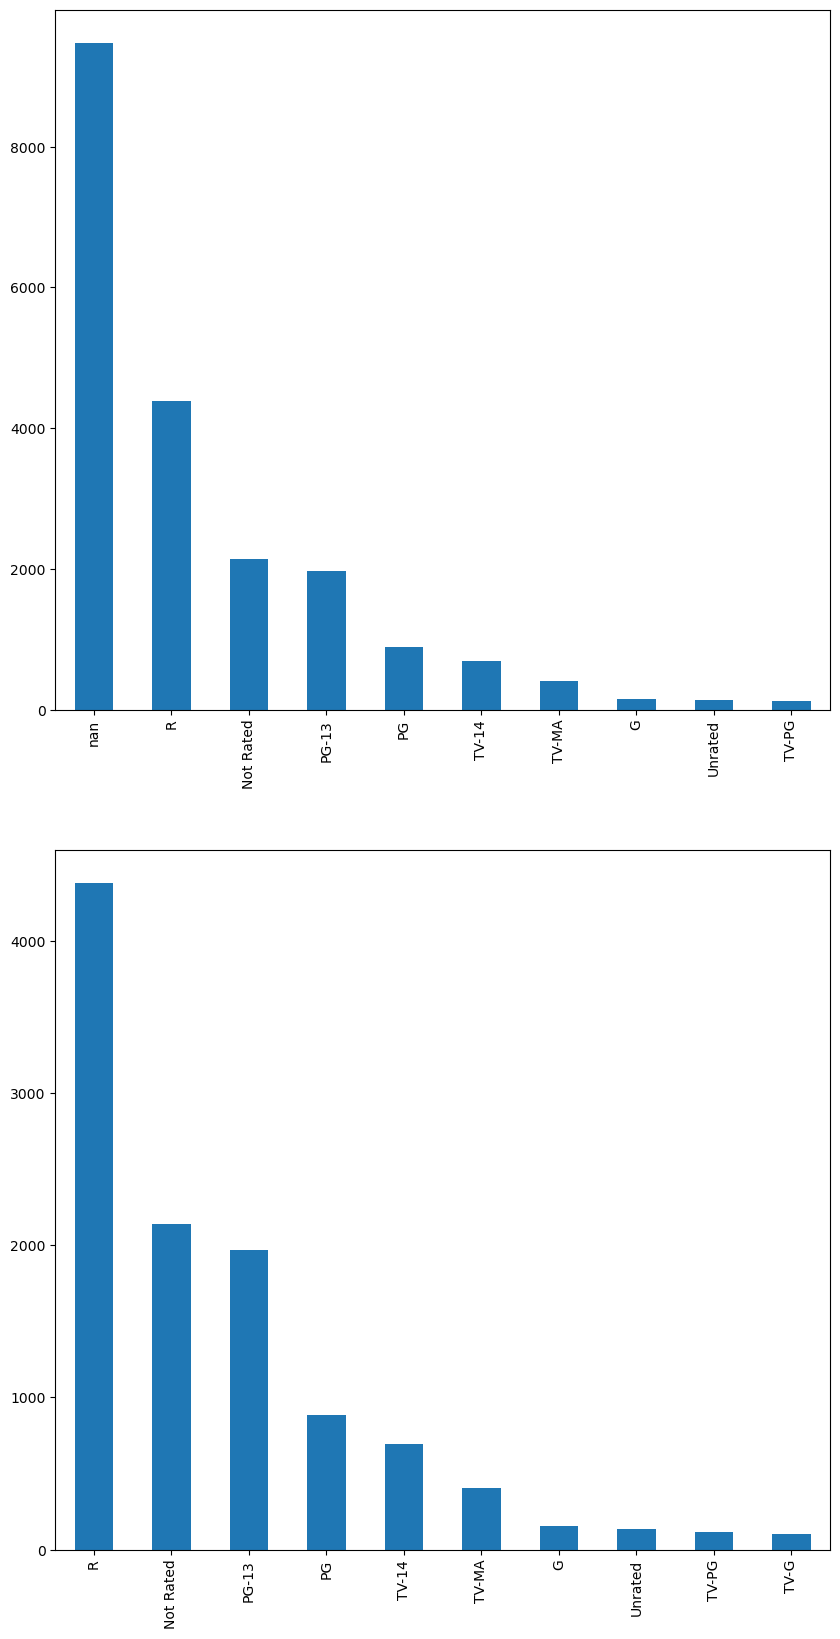

In [42]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))

处理**director**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [43]:
attribute = "director"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

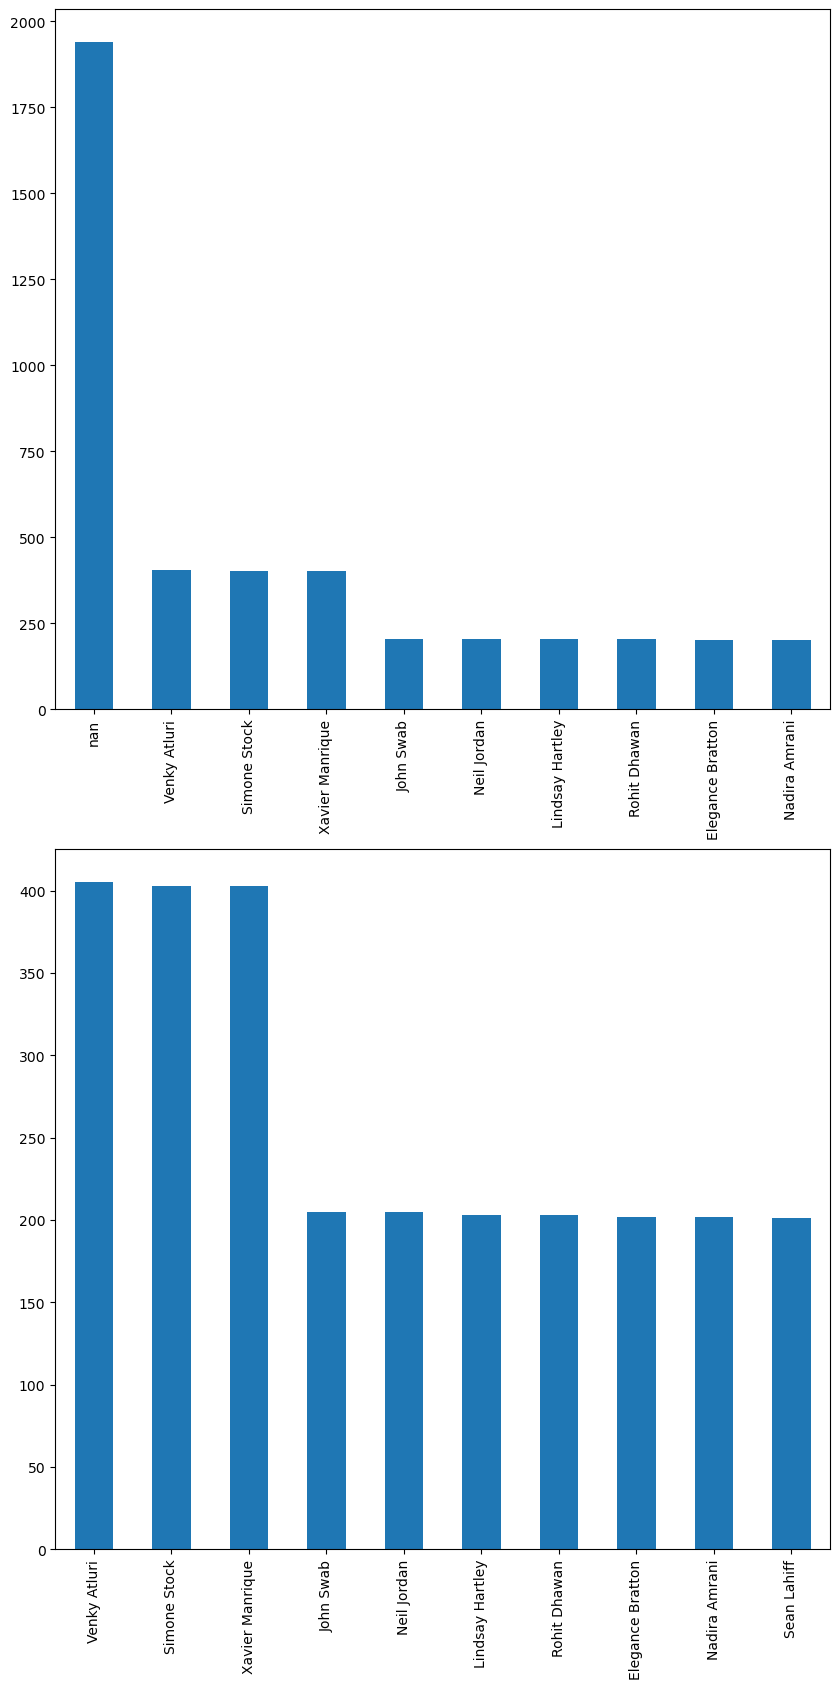

In [44]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))

处理**language**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [45]:
attribute = "language"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

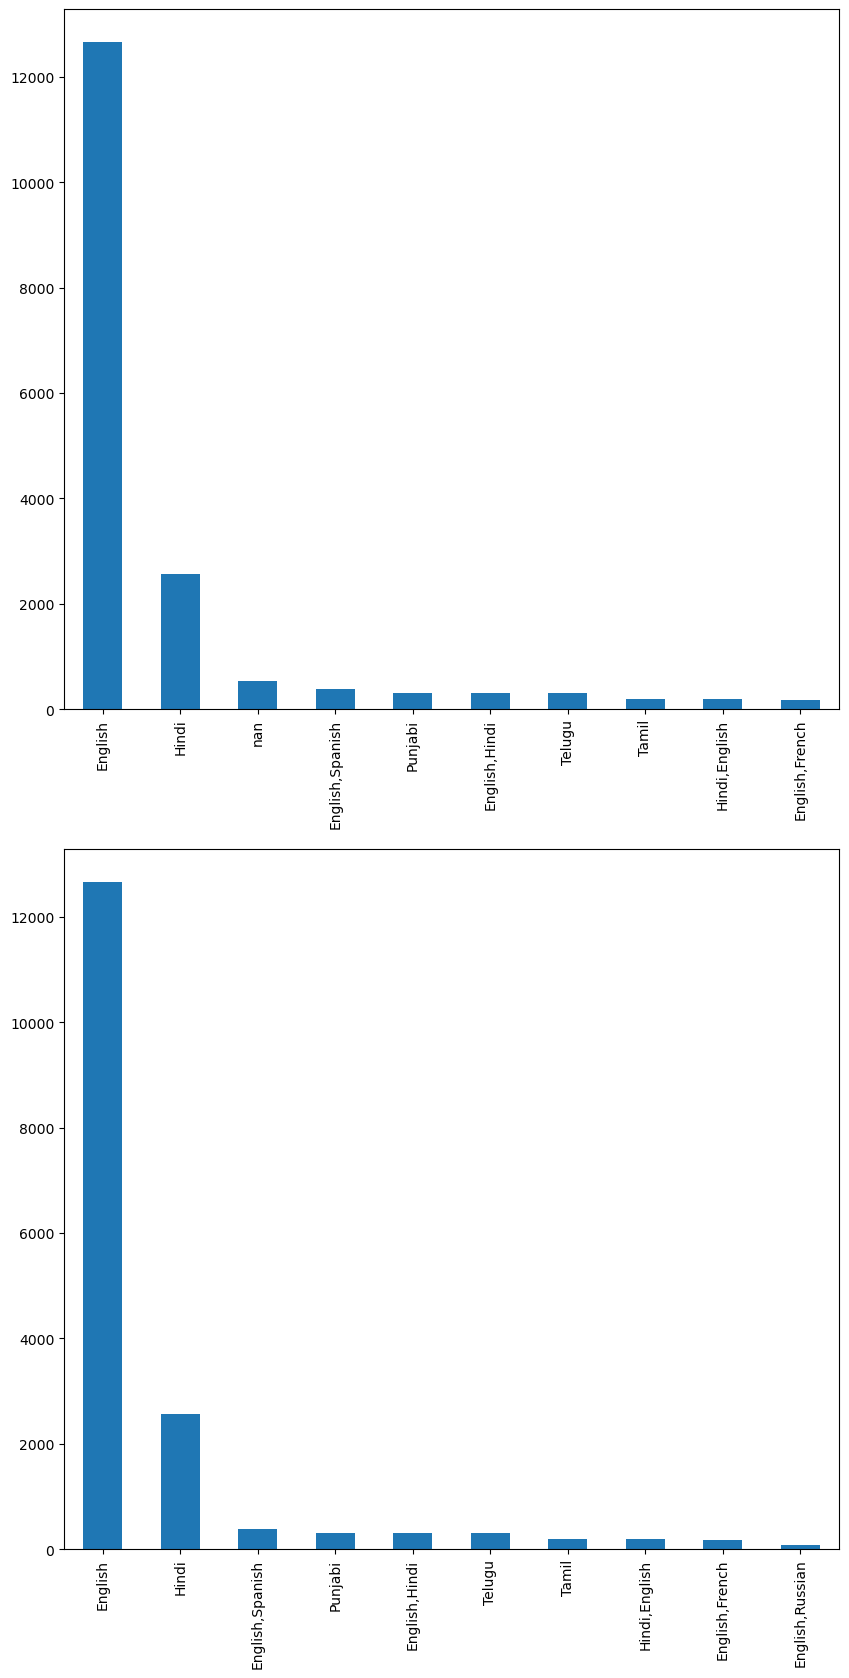

In [46]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))

处理**run_time**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [47]:
attribute = "run_time"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

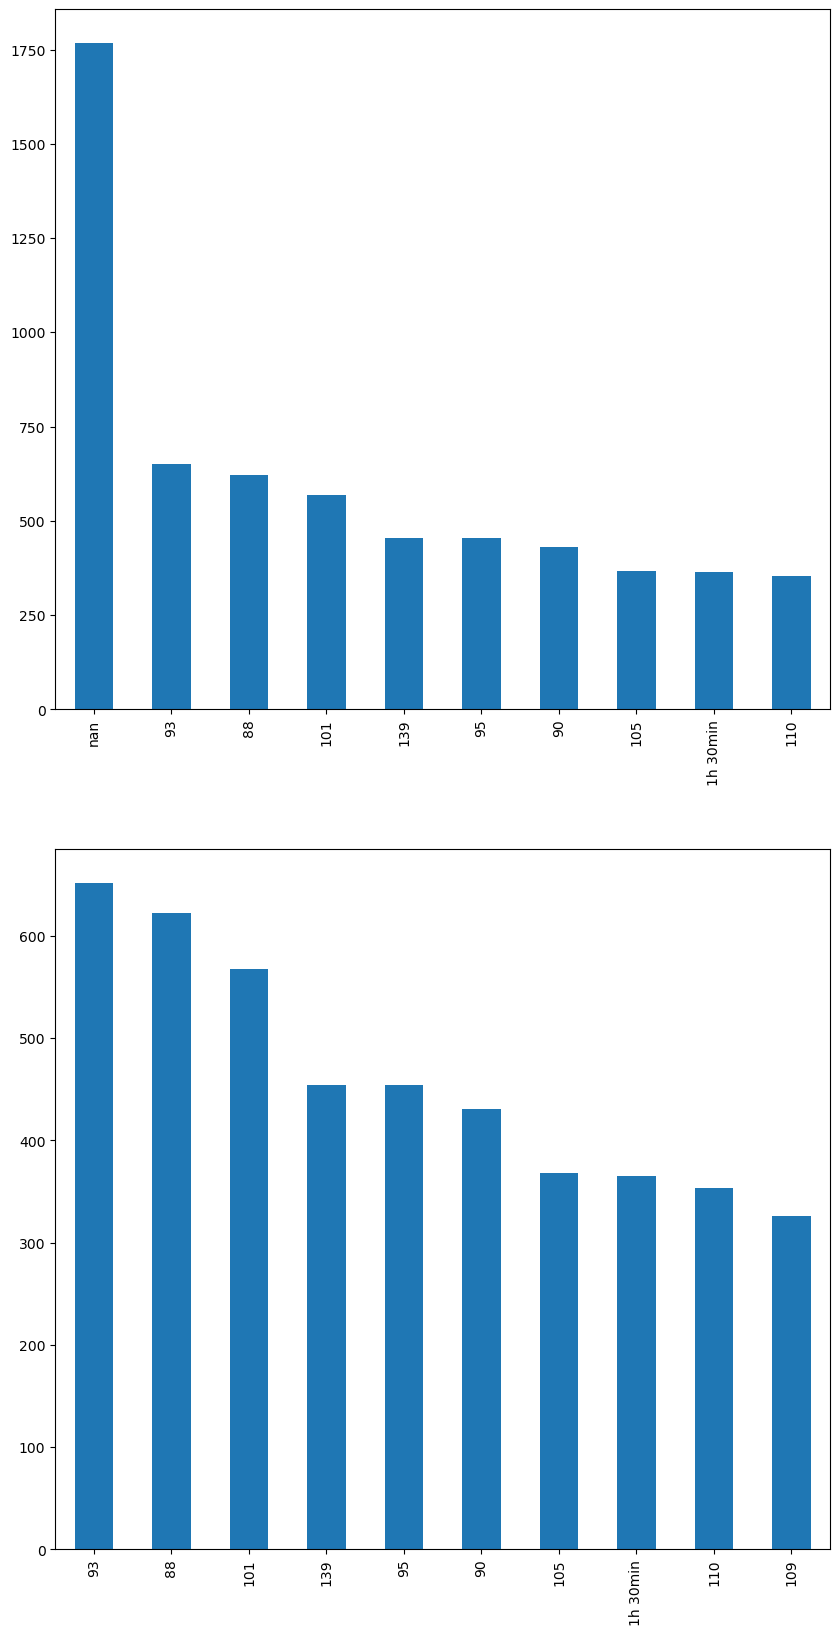

In [48]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))

处理**storyline**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [49]:
attribute = "storyline"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

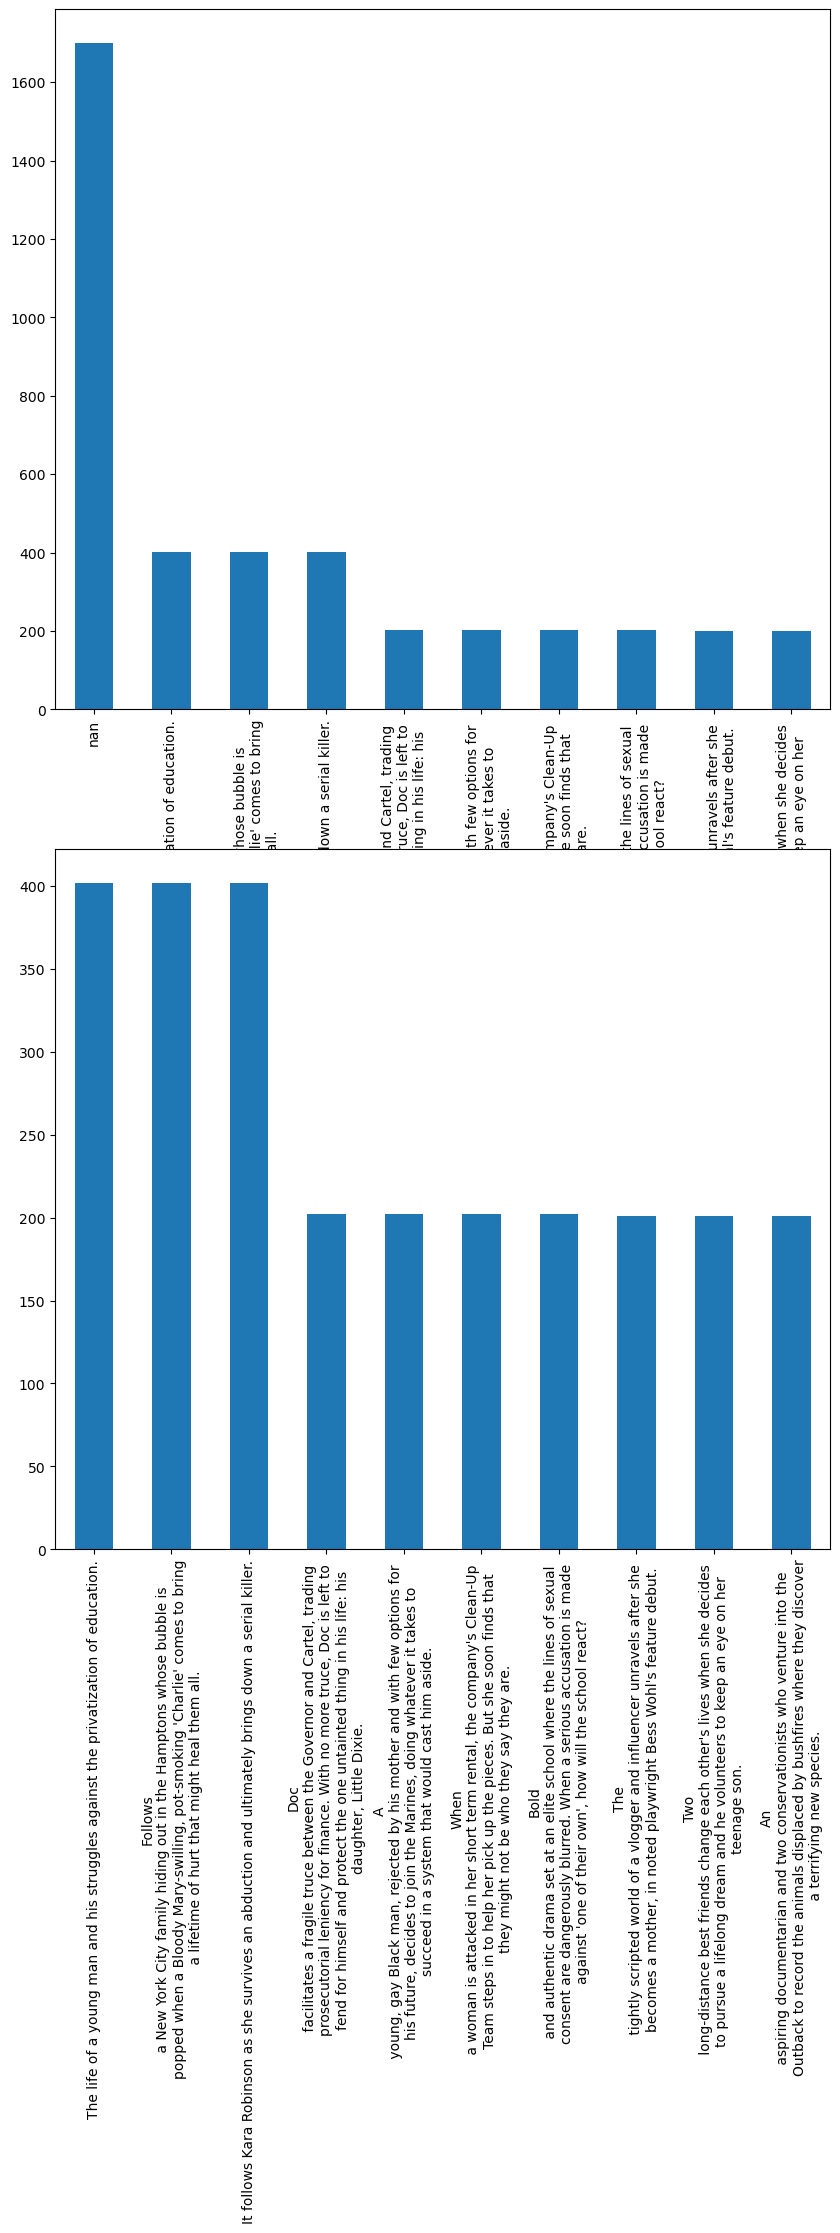

In [50]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))

处理**writer**属性的缺失

缺失的原因：可能是在数据统计的过程中出现了错误。

选择策略：将缺失部分剔除

In [51]:
attribute = "writer"
dataset_new = dataset.dropna(subset=[attribute])

<Axes: >

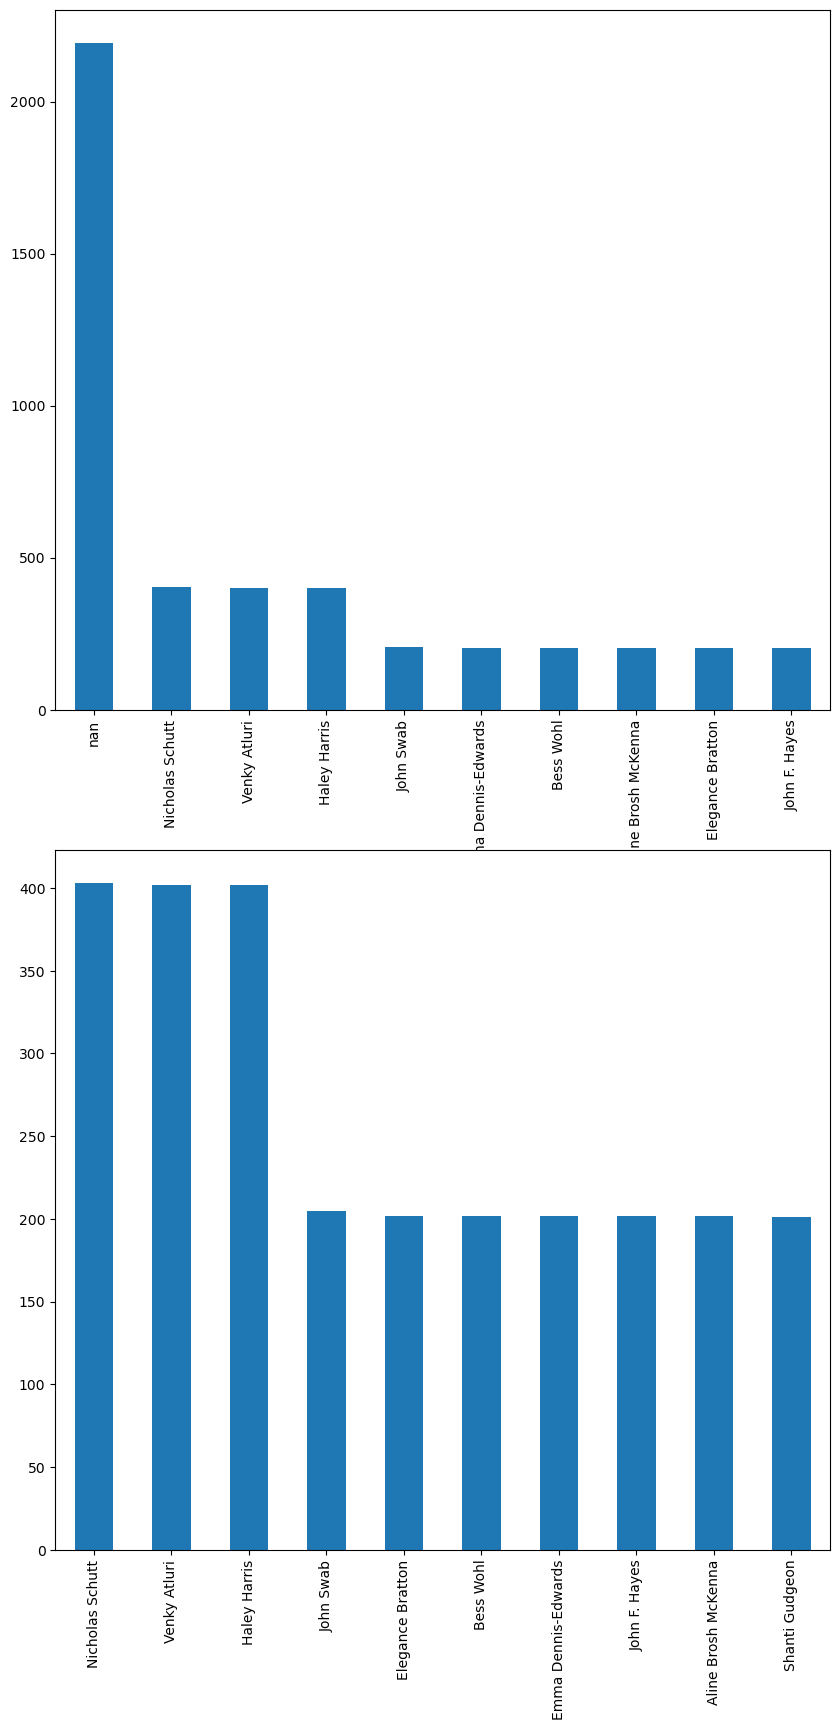

In [52]:
#对比新旧数据集
plt.subplot(2,1,1)
dataset[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,8))
plt.subplot(2,1,2)
dataset_new[attribute].value_counts(dropna=False)[:10].plot(kind="bar",figsize=(10,20))